In [127]:
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import col as Col

weights=[0.8,0.2]
seed=42

In [128]:
data=pd.read_csv('/Users/adityavyas/Desktop/Machine Learning and Big Data/Datasets/iris-species/Iris.csv')

In [129]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [130]:
data.drop('Id',1,inplace=True)

In [131]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [132]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


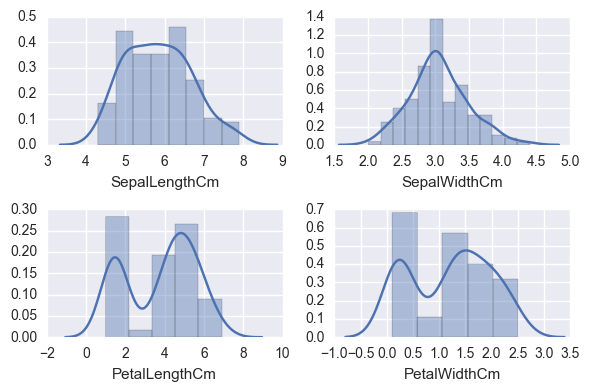

In [133]:
#We check for outliers
fig,axes=plt.subplots(2,2)
sns.distplot(data['SepalLengthCm'],ax=axes[0,0])
sns.distplot(data['SepalWidthCm'],ax=axes[0,1])
sns.distplot(data['PetalLengthCm'],ax=axes[1,0])
sns.distplot(data['PetalWidthCm'],ax=axes[1,1])
plt.tight_layout()

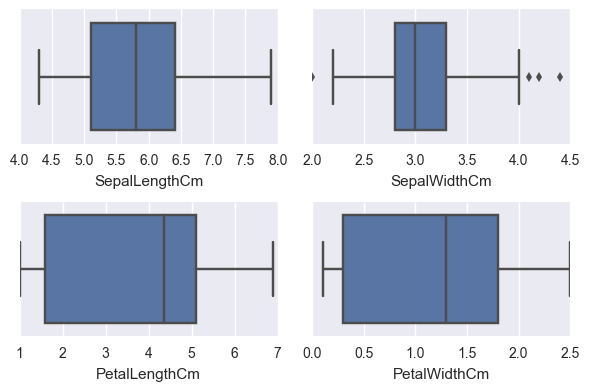

In [134]:
#Petal data is not normal and we look at the Boxplots

fig,axes=plt.subplots(2,2)
sns.boxplot(data['SepalLengthCm'],ax=axes[0,0])
sns.boxplot(data['SepalWidthCm'],ax=axes[0,1])
sns.boxplot(data['PetalLengthCm'],ax=axes[1,0])
sns.boxplot(data['PetalWidthCm'],ax=axes[1,1])
plt.tight_layout()

In [135]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [136]:
data.replace({'Iris-setosa':'0','Iris-versicolor':'1','Iris-virginica':'2'},inplace=True)

In [137]:
#We look at the Sepal data and the Species

data['Sepal_Ratio']=data['SepalLengthCm']/data['SepalWidthCm']
data['Petal_Ratio']=data['PetalLengthCm']/data['PetalWidthCm']
data['Length_Ratio']=data['SepalLengthCm']/data['SepalWidthCm']
data['Width_Ratio']=data['SepalWidthCm']/data['PetalWidthCm']

In [138]:
data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_Ratio,Petal_Ratio,Length_Ratio,Width_Ratio
0,5.1,3.5,1.4,0.2,0,1.457143,7.0,1.457143,17.5
1,4.9,3.0,1.4,0.2,0,1.633333,7.0,1.633333,15.0
2,4.7,3.2,1.3,0.2,0,1.468750,6.5,1.468750,16.0
3,4.6,3.1,1.5,0.2,0,1.483871,7.5,1.483871,15.5
4,5.0,3.6,1.4,0.2,0,1.388889,7.0,1.388889,18.0


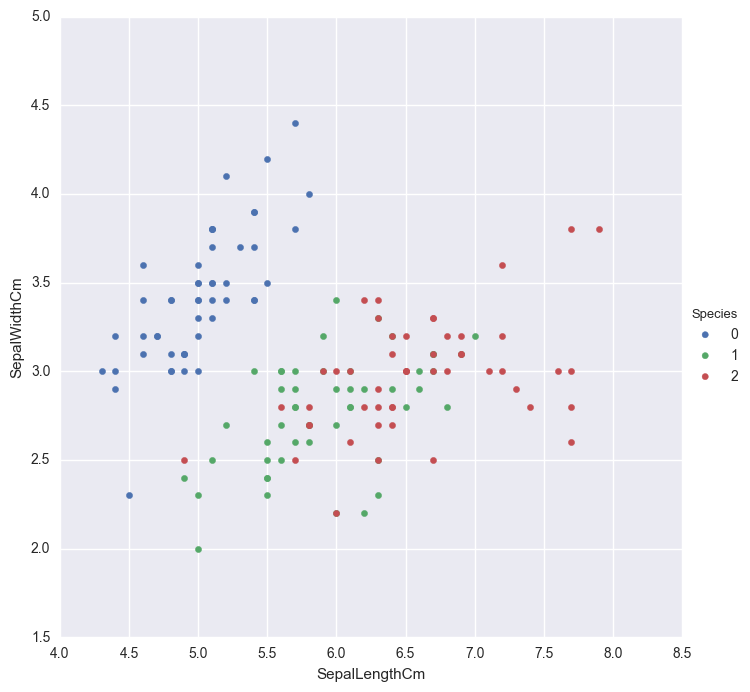

In [139]:
g=sns.FacetGrid(data,hue='Species',size=7)
g.map(plt.scatter,"SepalLengthCm","SepalWidthCm").add_legend()

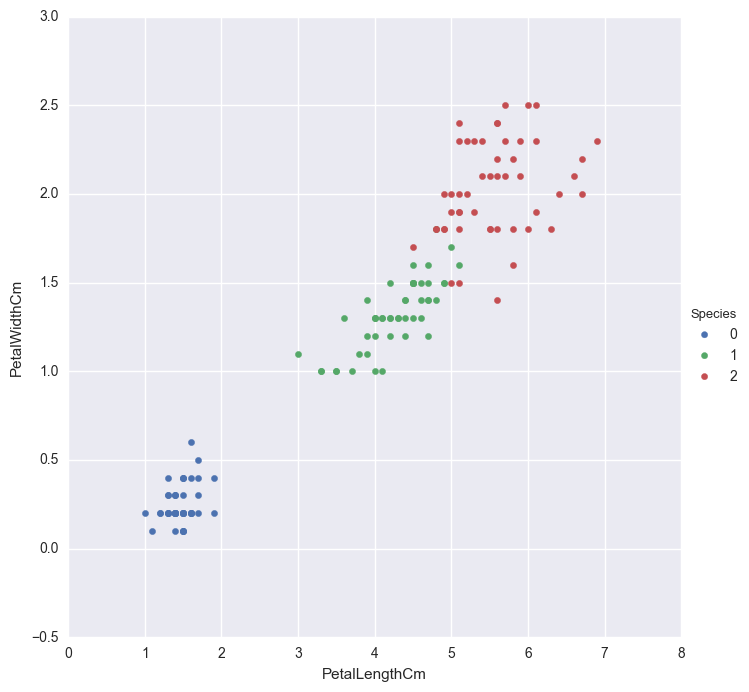

In [140]:
g=sns.FacetGrid(data,hue='Species',size=7)
g.map(plt.scatter,"PetalLengthCm","PetalWidthCm").add_legend()

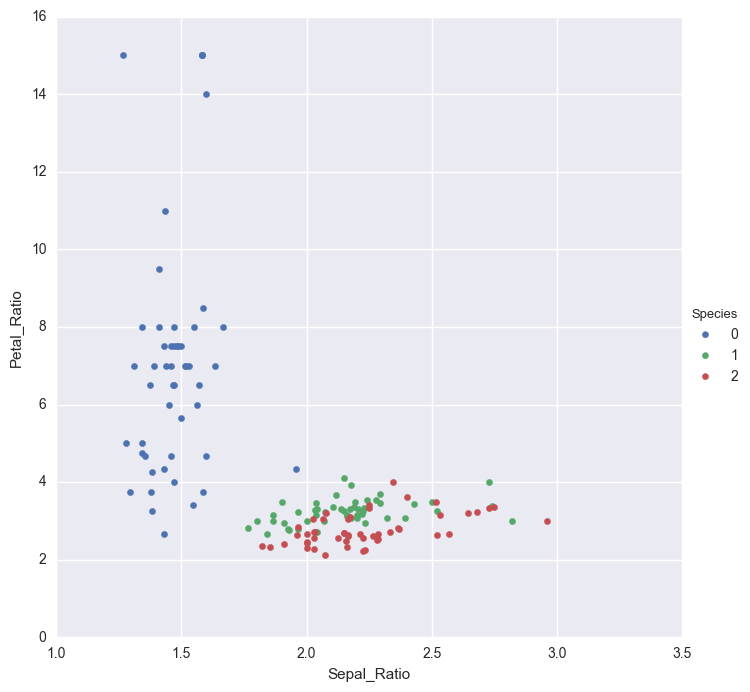

In [141]:
g=sns.FacetGrid(data,hue='Species',size=7)
g.map(plt.scatter,"Sepal_Ratio","Petal_Ratio").add_legend()

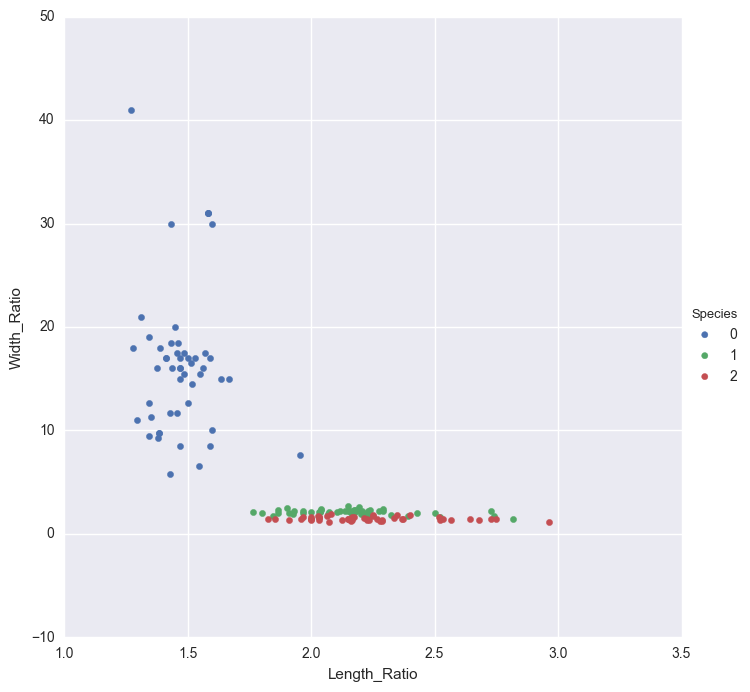

In [142]:
g=sns.FacetGrid(data,hue='Species',size=7)
g.map(plt.scatter,"Length_Ratio","Width_Ratio").add_legend()

In [143]:
from sklearn import cross_validation,linear_model,ensemble,metrics,svm

train,test=cross_validation.train_test_split(data,train_size=0.9)
train_,val=cross_validation.train_test_split(train,train_size=0.7)
len(train_),len(val),len(test)

(94, 41, 15)

In [144]:
x_train,y_train=train_.drop('Species',1),train_['Species']
x_val,y_val=val.drop('Species',1),val['Species']
x_test,y_test=test.drop('Species',1),test['Species']

In [145]:
logreg=linear_model.LogisticRegression(fit_intercept=True)
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_val)
accuracy=metrics.accuracy_score(y_val,y_pred)
accuracy

0.95121951219512191

In [146]:
sv=svm.SVC()
sv.fit(x_train,y_train)
y_pred=sv.predict(x_val)
accuracy=metrics.accuracy_score(y_val,y_pred)
accuracy

0.95121951219512191

In [147]:
Y_PRED1=logreg.predict(x_test)
Y_PRED2=sv.predict(x_test)

In [148]:
logreg_accuracy=metrics.accuracy_score(Y_PRED1,y_test)
svm_accuracy=metrics.accuracy_score(Y_PRED2,y_test)
logreg_accuracy,svm_accuracy

(1.0, 1.0)